### 202045062 김수민
### Rep 4. 선형회귀 구현하기
- 공부시간에 따른 성적 예측 문제(시각화 포함)
  1. Scikitlearn 이용
  2. Numpy 이용

1. 사이킷런을 사용한 선형회귀 구현

[83.6 88.2 92.8 97.4]
계수 : [2.3]   절편 : 79.0


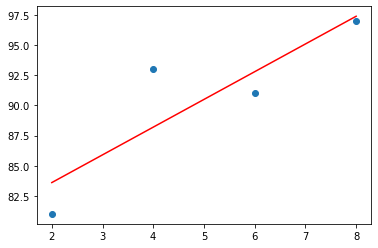

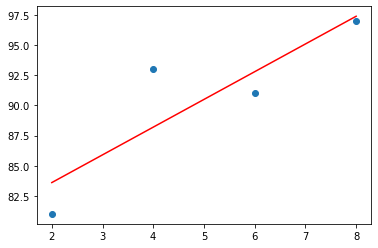

In [55]:

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

hour = np.array([2, 4, 6 ,8]).reshape(-1,1)
score = np.array([81, 93, 91, 97])

lr = LinearRegression()
lr.fit(hour, score)
print(lr.predict(hour))
print(f'계수 : {lr.coef_}   절편 : {lr.intercept_}')
lr.score(hour, lr.predict(hour))

# 선형회귀 그래프 predict 사용
plt.plot(hour, lr.predict(hour), color='r')
plt.scatter(hour, score)
plt.show()

# 선형회귀 그래프 계수, 절편 사용
plt.plot(hour, lr.coef_*hour + lr.intercept_, color='r')
plt.scatter(hour, score)
plt.show()

2. 넘파이 구현

In [56]:
hour = np.array([2, 4, 6 ,8])
score = np.array([81, 93, 91, 97])

# 하이퍼 파라미터
w = 0
b = 0
lr = 0.01
epochs = 2000

# 모델 학습
for i in range(0, epochs):
  y_pred = w * hour + b # 예측값 
  error = score - y_pred # 실제값 - 예측값 -> 오차율
  W_diff = (-1 * (1/len(hour))) * sum(hour * error) # 기울기를 기준으로 미분
  b_diff = (-1 * (1/len(hour))) * sum(score - y_pred) # 절편을 기준으로 미분

  w = w - lr*W_diff # 러닝메이트로 기울기
  b = b - lr*b_diff # 러닝메이트로 절편
  
  # 출력
  print(f'epochs {i}번째  기울기 : {w}    절편 : {b}')

epochs 0번째  기울기 : 4.64    절편 : 0.905
epochs 1번째  기울기 : 7.84275    절편 : 1.56895
epochs 2번째  기울기 : 10.0514775    절편 : 2.066123
epochs 3번째  기울기 : 11.5727281    절편 : 2.447887895
epochs 4번째  기울기 : 12.618515275250001    절편 : 2.74977261105
epochs 5번째  기울기 : 13.3354720621225    절편 : 2.996349121177
epochs 6번째  기울기 : 13.8250129874269    절편 : 3.2046120268591047
epochs 7번째  기울기 : 14.157278489855875    절편 : 3.386315257219169
epochs 8번째  기울기 : 14.380779180038154    절편 : 3.5495881801541835
epochs 9번째  기울기 : 14.529066017018998    절편 : 3.7000533393507338
epochs 10번째  기울기 : 14.625343544945762    절편 : 3.8415995051062763
epochs 11번째  기울기 : 14.68566050620672    절편 : 3.9769163328079253
epochs 12번째  기울기 : 14.721116537704306    절편 : 4.10786414416951
epochs 13번째  기울기 : 14.739388369184539    절편 : 4.2357296758426
epochs 14번째  기울기 : 14.745785374637046    절편 : 4.361402960624947
epochs 15번째  기울기 : 14.743979614214686    절편 : 4.485499662286845
epochs 16번째  기울기 : 14.736510746835938    절편 : 4.608445684953242
epochs 17번

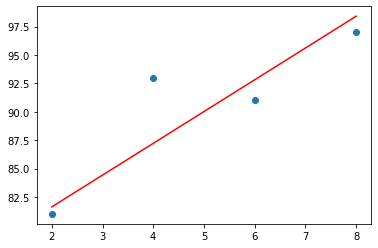

In [57]:
plt.scatter(hour, score)
plt.plot(hour, w*hour + b, color='r')

2. (번외) 넘파이 공분산

계수 : 2.3   절편 : 79.0


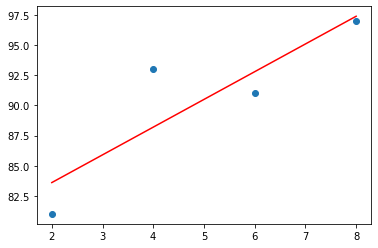

In [63]:
hour = np.array([2, 4, 6 ,8])
score = np.array([81, 93, 91, 97])

# hour 평군, score 평균
mean_x = np.mean(hour)
mean_y = np.mean(score)

# x실제값 - x평균 * y실제값 - y 평균 합
# (x실제값 - x평균)^2 합

xy = sum((hour-mean_x) * (score-mean_y))
x2 = sum((hour-mean_x)**2)

# 기울기 및 절편
w = xy/x2
b = mean_y - (w*mean_x)
print(f'계수 : {w}   절편 : {b}')

# 그래프
plt.scatter(hour, score)
plt.plot(hour, w*hour + b, color='r')